In [92]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Dropping columns with Nan

xls = pd.ExcelFile('crunchbase_monthly_export_d43b4klo2ade53.xlsx')

df1 = pd.read_excel(xls, 'Investments')

df1 = df1[(df1['company_region'] == 'SF Bay Area')]

df1 = df1[(df1['funded_year'] >= 2004)]

print(df1.shape)

df1 = df1[df1['raised_amount_usd'].isna() == False]

df1 = df1[df1['company_name'].isna() == False]

print(df1.shape)

### Dated Code

xls = pd.ExcelFile('crunchbase_monthly_export_d43b4klo2ade53.xlsx')

df1 = pd.read_excel(xls, 'Investments')

df1 = df1[(df1['company_region'] == 'SF Bay Area')]

df1 = df1[(df1['funded_year'] >= 2004)]

print(df1.shape)

df1 = df1[df1['raised_amount_usd'].isna() == False]

df1 = df1[df1['company_name'].isna() == False]

print(df1.shape)


### What Years Are Represented?

In [2]:
df1 = pd.read_csv('startups_sf_2004-14_data.csv')

In [125]:
df1.head(100)

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,fILIPPO Murroni,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/virtuallogix,VirtualLogix,|Mobile|Virtualization|Software|,Software,USA,CA,SF Bay Area,Sunnyvale,/organization/atlas-venture,Atlas Venture,...,Boston,Cambridge,/funding-round/8534a4893af02254af3104fa91a4cdbf,venture,A,2004-01-01,2004-01,2004-Q1,2004,12000000.0
1,/organization/virtuallogix,VirtualLogix,|Mobile|Virtualization|Software|,Software,USA,CA,SF Bay Area,Sunnyvale,/organization/cisco,Cisco,...,SF Bay Area,San Jose,/funding-round/8534a4893af02254af3104fa91a4cdbf,venture,A,2004-01-01,2004-01,2004-Q1,2004,12000000.0
2,/organization/deem,Deem,|Trading|Marketplaces|Content Syndication|Prod...,E-Commerce,USA,CA,SF Bay Area,San Francisco,/organization/empire-capital-partners,Empire Capital Partners,...,Hartford,Westport,/funding-round/dc687f1c43ce40715ec25416113fbd62,venture,NaN,2004-01-01,2004-01,2004-Q1,2004,42000000.0
3,/organization/deem,Deem,|Trading|Marketplaces|Content Syndication|Prod...,E-Commerce,USA,CA,SF Bay Area,San Francisco,/organization/foundation-capital,Foundation Capital,...,SF Bay Area,Menlo Park,/funding-round/dc687f1c43ce40715ec25416113fbd62,venture,NaN,2004-01-01,2004-01,2004-Q1,2004,42000000.0
4,/organization/virtuallogix,VirtualLogix,|Mobile|Virtualization|Software|,Software,USA,CA,SF Bay Area,Sunnyvale,/organization/index-ventures,Index Ventures,...,Geneva,Geneva,/funding-round/8534a4893af02254af3104fa91a4cdbf,venture,A,2004-01-01,2004-01,2004-Q1,2004,12000000.0
5,/organization/pandora,Pandora Media,|Broadcasting|Video Streaming|Music|,Broadcasting,USA,CA,SF Bay Area,Oakland,/organization/labrador-ventures,Labrador Ventures,...,SF Bay Area,Palo Alto,/funding-round/049bb132e44088cfea4b028f4e45c332,venture,B,2004-01-01,2004-01,2004-Q1,2004,7800000.0
6,/organization/playfirst,PlayFirst,|iPhone|Mobile Games|Games|,Games,USA,CA,SF Bay Area,San Francisco,/organization/mayfield-fund,Mayfield Fund,...,SF Bay Area,Menlo Park,/funding-round/7cb05dd431eb04e33f18bd4356cece1c,venture,A,2004-01-01,2004-01,2004-Q1,2004,5000000.0
7,/organization/socialtext,Socialtext,|Collaboration|Software|Networking|Web Tools|E...,Enterprise Software,USA,CA,SF Bay Area,Palo Alto,/organization/omidyar-network,Omidyar Network,...,SF Bay Area,Redwood City,/funding-round/f56a156cbd40adfb029c194ecba4297b,angel,NaN,2004-01-01,2004-01,2004-Q1,2004,300000.0
8,/organization/deem,Deem,|Trading|Marketplaces|Content Syndication|Prod...,E-Commerce,USA,CA,SF Bay Area,San Francisco,/organization/palo-alto-investors,Palo Alto Investors,...,SF Bay Area,Palo Alto,/funding-round/dc687f1c43ce40715ec25416113fbd62,venture,NaN,2004-01-01,2004-01,2004-Q1,2004,42000000.0
9,/organization/pandora,Pandora Media,|Broadcasting|Video Streaming|Music|,Broadcasting,USA,CA,SF Bay Area,Oakland,/organization/selby-venture-partners,Selby Venture Partners,...,SF Bay Area,Menlo Park,/funding-round/049bb132e44088cfea4b028f4e45c332,venture,B,2004-01-01,2004-01,2004-Q1,2004,7800000.0


In [3]:
sorted(list(df1['funded_year'].unique()))

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

In [4]:
grouped_df1 = df1.groupby(['company_name'])['raised_amount_usd']

In [5]:
keys = []
funding = []
fund_dict = {}
for key, item in grouped_df1:
    keys.append(key)
    fund_dict[key] = grouped_df1.get_group(key)
    #print(key)
    #print(grouped_df1.get_group(key), "\n")

## Looking at 23andMe, just because it's a cool company

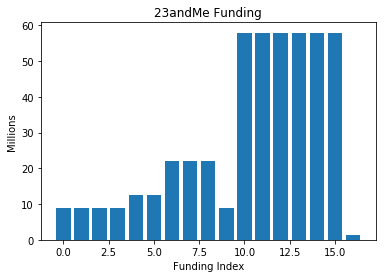

In [6]:
plt.bar(range(len(fund_dict['23andMe'])), fund_dict['23andMe']/1e6)
plt.title('23andMe Funding')
plt.xlabel('Funding Index')
plt.ylabel('Millions')
plt.show()

In [7]:
len(fund_dict.keys())

4585

## Looking Into Most Funded Markets

In [8]:
grouped_df2 = df1.groupby(['company_market'])['raised_amount_usd']

In [9]:
keys_market = []
funding = []
market_dict = {}
for key, item in grouped_df2:
    keys_market.append(key)
    market_dict[key] = sum(grouped_df2.get_group(key))
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [10]:
from heapq import nlargest
largest = nlargest(20, market_dict, key=market_dict.get)
print(largest) 

['Biotechnology', 'Software', 'Clean Technology', 'Health Care', 'Enterprise Software', 'Semiconductors', 'Transportation', 'Curated Web', 'Mobile', 'Analytics', 'Technology', 'Advertising', 'Hardware + Software', 'Games', 'Security', 'E-Commerce', 'Web Hosting', 'Cloud Data Services', 'Solar', 'Storage']


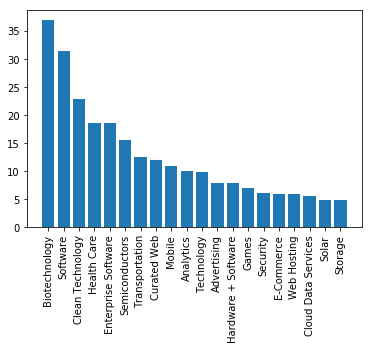

In [11]:
plt.bar(largest,[market_dict[x]/1e9 for x in largest])
plt.xticks(rotation='vertical')
plt.show()

In [12]:
#print(df_rp['raised_amount_usd'].sum()/1e6,"million")

In [13]:
grouped_df3 = df1.groupby(['funding_round_code'])['raised_amount_usd']

## Average Funding Per Round

In [14]:
keys_funding_round_code = []
funding_round_dict = {}
for key, item in grouped_df3:
    keys_funding_round_code.append(key)
    funding_round_dict[key] = sum(grouped_df3.get_group(key))/len(grouped_df3.get_group(key))
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [15]:
print(funding_round_dict.keys())
funding_round_dict.values()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])


dict_values([7207014.403003107, 17139449.768692117, 24654974.959298685, 36226887.297698945, 37544372.876777254, 50240607.07931034, 74752909.9361702, 50000000.0])

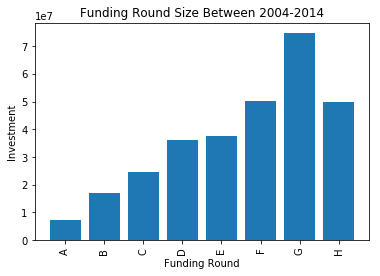

In [16]:
plt.bar(funding_round_dict.keys(),funding_round_dict.values())
plt.xticks(rotation='vertical')
plt.xlabel('Funding Round')
plt.ylabel('Investment')
plt.title('Funding Round Size Between 2004-2014')
plt.show()

Number of startups who achieved funding

In [17]:
grouped_df4 = df1.groupby(['funding_round_code'])['company_name']

In [18]:
keys_funding_name_code = []
funding_name_dict = {}
for key, item in grouped_df4:
    keys_funding_name_code.append(key)
    funding_name_dict[key] = grouped_df4.get_group(key)
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [19]:
funding_name_dict.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

In [20]:
funding_name_dict.values();

In [21]:
funding_counts = []
for alpha in funding_name_dict.keys():
    funding_counts.append(sum([1 for x in funding_name_dict[alpha]]))

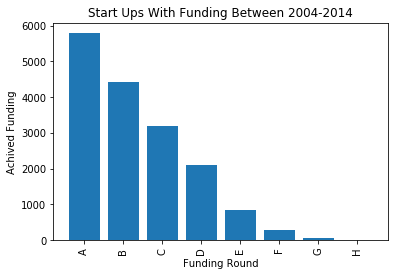

In [22]:
plt.bar(funding_name_dict.keys(),funding_counts)
plt.xticks(rotation='vertical')
plt.xlabel('Funding Round')
plt.ylabel('Achived Funding')
plt.title('Start Ups With Funding Between 2004-2014')
plt.show()

## Companies With The Most Funding

In [23]:
grouped_df5 = df1.groupby(['company_name'])['raised_amount_usd']

In [24]:
keys_funding_company_code = []
funding_company_dict = {}
for key, item in grouped_df5:
    keys_funding_company_code.append(key)
    funding_company_dict[key] = sum(grouped_df5.get_group(key))
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [25]:
funding_company_dict;

In [26]:
most_funded_companies = nlargest(20, funding_company_dict, key=funding_company_dict.get)
print(most_funded_companies) 

['Uber', 'Nanosolar', 'Dropbox', 'Facebook', 'Pinterest', 'Twitter', 'Pure Storage', 'Box', 'Airbnb', 'Zynga', 'SurveyMonkey', 'Bloom Energy', 'Lyft', 'Pacific Biosciences', 'CardioDx', 'BrightSource Energy', 'Better Place', 'Square', 'InVitae', 'Cloudera']


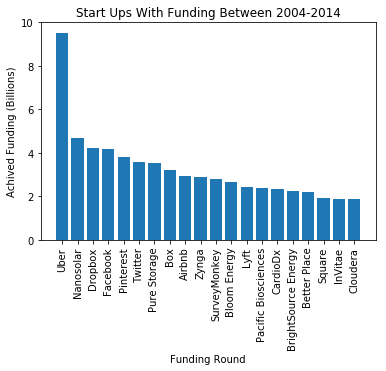

In [27]:
plt.bar(most_funded_companies,[funding_company_dict[x]/1e9 for x in most_funded_companies])
plt.xticks(rotation='vertical')
plt.xlabel('Funding Round')
plt.ylabel('Achived Funding (Billions)')
plt.title('Start Ups With Funding Between 2004-2014')
plt.show()

In [28]:
df1.columns

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_market', 'company_country_code', 'company_state_code',
       'company_region', 'company_city', 'investor_permalink',
       'fILIPPO Murroni', 'investor_category_list', 'investor_market',
       'investor_country_code', 'investor_state_code', 'investor_region',
       'investor_city', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'funded_month', 'funded_quarter',
       'funded_year', 'raised_amount_usd'],
      dtype='object')

In [29]:
df_base = df1[['company_name','company_market','company_city']]
df_base.drop_duplicates();

## Bringing In Aquisition Data

In [31]:
# Create a dataframe of all acquisitions
df_acq = pd.read_csv('acquisitions_data.csv')

# List of all companies that have been acquired
acquired_list = list(df_acq['company_name'])

In [32]:
# Function to check whether a company has been acquired or not.

def acquired_check(i):
    if i in acquired_list:
        return 1
    else: 
        return 0

In [33]:
target = df_base['company_name'].map(acquired_check);
print(target.shape)

(29220,)


In [34]:
df_base.reset_index;

In [35]:
funding_company_dict['VirtualLogix']/1e6

100.0

In [36]:
df_base['total_funding'] = df_base['company_name'].apply(lambda x: funding_company_dict[x]/1e6)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_base = df_base.reset_index(drop=True);

In [38]:
print(df_base.columns)
print(df_base.shape)

Index(['company_name', 'company_market', 'company_city', 'total_funding'], dtype='object')
(29220, 4)


In [39]:
df_base['company_market'].unique();

## Create Dummy Variables For Categorical Data

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer
def bin_multi_label(dataframe,column_name):
    data_ = dataframe[column_name].value_counts()

    list_ = [[i] for i in list(dataframe[column_name])]

    one_hot = MultiLabelBinarizer()
    one_hot.fit([list(data_.index)]) 
    one_hot_data_= one_hot.transform(list_)

    #print("Model Classes:", one_hot.classes_)
    model_df = pd.DataFrame(one_hot_data_,columns = one_hot.classes_)
    #print("Shape is:",model_df.shape)
    #print("\n")
    return one_hot, model_df

In [41]:
mlb_market,market_df = bin_multi_label(df_base,'company_market');
mlb_city,city_df = bin_multi_label(df_base,'company_city');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:930: UserWarning: unknown class(es) [nan] will be ignored
  .format(sorted(unknown, key=str)))


In [127]:
mlb_market.transform

<bound method MultiLabelBinarizer.transform of MultiLabelBinarizer(classes=None, sparse_output=False)>

In [63]:
city_df.columns

Index(['Alameda', 'Alamo', 'Belmont', 'Belvedere Tiburon', 'Benicia',
       'Berkeley', 'Brentwood', 'Brisbane', 'Burlingame', 'Campbell',
       'Corte Madera', 'Cupertino', 'Danville', 'Dublin', 'East Palo Alto',
       'Emeryville', 'Foster City', 'Fremont', 'Hayward', 'Lafayette',
       'Larkspur', 'Livermore', 'Los Altos', 'Los Altos Hills', 'Los Gatos',
       'Menlo Park', 'Mill Valley', 'Millbrae', 'Milpitas', 'Moraga',
       'Morgan Hill', 'Mountain View', 'Newark', 'Novato', 'Oakland', 'Orinda',
       'Palo Alto', 'Pittsburg', 'Pleasant Hill', 'Pleasanton',
       'Portola Valley', 'Redwood City', 'Redwood Shores', 'Richmond',
       'San Bruno', 'San Carlos', 'San Francisco', 'San Jose', 'San Leandro',
       'San Mateo', 'San Rafael', 'San Ramon', 'Santa Clara', 'Santa Cruz',
       'Saratoga', 'Sausalito', 'Scotts Valley', 'South San Francisco',
       'Stanford', 'Sunnyvale', 'Union City', 'Walnut Creek'],
      dtype='object')

In [42]:
print(market_df.shape,city_df.shape,df_base['total_funding'].shape)

(29220, 438) (29220, 62) (29220,)


In [64]:
df_base.head(1)

Index(['company_name', 'company_market', 'company_city', 'total_funding'], dtype='object')

In [74]:
data_encoded = pd.concat([market_df,city_df,df_base['total_funding']], axis=1,sort=False)

In [75]:
print('shape',data_encoded.shape)
print('target',target.shape)

shape (29220, 501)
target (29220,)


In [76]:
data_encoded.columns

Index(['3D', '3D Printing', 'Accounting', 'Ad Targeting', 'Advertising',
       'Advertising Platforms', 'Aerospace', 'Agriculture', 'Algorithms',
       'All Markets',
       ...
       'Santa Cruz', 'Saratoga', 'Sausalito', 'Scotts Valley',
       'South San Francisco', 'Stanford', 'Sunnyvale', 'Union City',
       'Walnut Creek', 'total_funding'],
      dtype='object', length=501)

## Testing A Logistic Regression Model With Base Data

Metrics interpretations

1) **Precision** - We don't want to spend money on startups that will fail

2) **Recall** - Minimizing missed opportunities 

**Accuracy** - We want to ideally correctly identify all startups

**False Negative** - We missed out on very good opportunities 

## Prepare Data From Model

In [165]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix


X = data_encoded
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444)


In [170]:
X.describe()


,3D,3D Printing,Accounting,Ad Targeting,Advertising,Advertising Platforms,Aerospace,Agriculture,Algorithms,All Markets,...,Santa Cruz,Saratoga,Sausalito,Scotts Valley,South San Francisco,Stanford,Sunnyvale,Union City,Walnut Creek,total_funding
count,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,...,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000
mean,0.000445,0.000376,0.000924,0.000205,0.031622,0.001095,0.001437,0.001164,0.000171,0.001198,...,0.000719,0.000924,0.001643,0.000582,0.012183,0.000342,0.045448,0.000137,0.000411,237.455324
std,0.021088,0.019399,0.030384,0.014328,0.174995,0.033075,0.037886,0.034092,0.013080,0.034589,...,0.026799,0.030384,0.040498,0.024114,0.109706,0.018497,0.208289,0.011700,0.020261,580.526440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.200000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,226.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9518.150000


## Initial Feature Selection With Stats Models

In [166]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train)
results = logit_model.fit(method='ncg')

Optimization terminated successfully.
         Current function value: 0.637656
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [168]:
X_train.head(10)

,const,3D,3D Printing,Accounting,Ad Targeting,Advertising,Advertising Platforms,Aerospace,Agriculture,Algorithms,...,Santa Cruz,Saratoga,Sausalito,Scotts Valley,South San Francisco,Stanford,Sunnyvale,Union City,Walnut Creek,total_funding
6215,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,338.400
18588,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,162.500
6403,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,132.000
24303,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.050
3113,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,265.000
5243,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2886.013
24929,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19.898
24324,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.900
2415,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,320.000
6146,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,377.550


In [167]:
results.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           company_name   No. Observations:                23376
Model:                          Logit   Df Residuals:                    22882
Method:                           MLE   Df Model:                          493
Date:                Fri, 19 Oct 2018   Pseudo R-squ.:                 -0.2861
Time:                        09:32:57   Log-Likelihood:                -14906.
converged:                       True   LL-Null:                       -11590.
                                        LLR p-value:                     1.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               -3.03e-06        nan        nan        nan         nan         nan
3D                                 -2.137e-09        nan        nan        nan         nan         nan
3D Printing                        -1.496e-09        nan        nan        nan         nan         nan
Accounting                         -4.914e-09        nan        nan        nan         nan         nan
Ad Targeting                       -1.068e-09        nan        nan        nan         nan         nan
Advertising                        -5.256e-08        nan        nan        nan         nan         nan
Advertising Platforms              -4.701e-09        nan        nan        nan         nan         nan
Aerospace                          -4.273e-09        nan        nan        nan         nan         nan
Agriculture                         4.914e-09        nan        nan        nan         nan         nan
Algorithms                         -1.068e-09        nan        nan        nan         nan         nan
All Markets                         2.778e-09        nan        nan        nan         nan         nan
All Students                       -4.487e-09        nan        nan        nan         nan         nan
Analytics                          -8.461e-08        nan        nan        nan         nan         nan
Android                            -2.991e-09        nan        nan        nan         nan         nan
App Discovery                      -1.282e-09        nan        nan        nan         nan         nan
App Marketing                      -8.546e-10        nan        nan        nan         nan         nan
App Stores                         -4.273e-10        nan        nan        nan         nan         nan
Application Performance Monitoring -1.709e-09        nan        nan        nan         nan         nan
Application Platforms               2.137e-09        nan        nan        nan         nan         nan
Apps                               -1.688e-08        nan        nan        nan         nan         nan
Architecture                                0        nan        nan        nan         nan         nan
Archiving                           2.564e-09        nan        nan        nan         nan         nan
Art                                -1.496e-09        nan        nan        nan         nan         nan
Artificial Intelligence            -1.282e-09        nan        nan        nan         nan         nan
Auctions                            -6.41e-10        nan        nan        nan         nan         nan
Audio                              -2.137e-10        nan        nan        nan         nan         nan
Augmented Reality                  -2.137e-10        nan        nan        nan         nan         nan
Automotive                          -1.56e-08        nan        nan        nan         nan         nan
B2B                                -3.632e-09   

In [163]:
X_train.shape

(23376, 502)

In [162]:
import numpy as np

np.linalg.eig(X_train)


LinAlgError: Last 2 dimensions of the array must be square

In [114]:
model = linear_model.LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

# accuracy for test & train:
train_acc=model.score(X_train, y_train)
test_acc=model.score(X_test,y_test)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_test
y_pred = model.predict(X_test)


conf = confusion_matrix(y_true, y_pred)
print(conf)

print ('\n')
print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))

cm=confusion_matrix(y_true, y_pred, labels=None)

Training Data Accuracy: 0.82
Test Data Accuracy:     0.81
[[4619   66]
 [1021  138]]


Precision:              0.82
Recall:                 0.99


In [82]:
len(X.columns)
len(model.coef_)

1

In [84]:
coef = list(zip(list(X.columns),list(model.coef_[0])))  
coef.append(('Intercept',model.intercept_[0]))
coef

[('3D', -0.5277288437758799),
 ('3D Printing', -0.6238591209062224),
 ('Accounting', -0.9630911462224964),
 ('Ad Targeting', -0.4875206583064246),
 ('Advertising', 1.268177047429793),
 ('Advertising Platforms', -1.0793277730578228),
 ('Aerospace', 0.9200330143595291),
 ('Agriculture', 3.9338470409360218),
 ('Algorithms', -0.38292731885657494),
 ('All Markets', 2.62415221206195),
 ('All Students', -0.8895891504699288),
 ('Analytics', 0.3173585550117112),
 ('Android', 1.4857393458557704),
 ('App Discovery', -0.5492167088668913),
 ('App Marketing', 0.5782001833343288),
 ('App Stores', -0.18387067409676236),
 ('Application Performance Monitoring', -0.5222582178056233),
 ('Application Platforms', 2.656006747995464),
 ('Apps', 0.7907687879954235),
 ('Architecture', 0.0),
 ('Archiving', 3.186746598334443),
 ('Art', -0.5210192391660138),
 ('Artificial Intelligence', -0.5316105807893327),
 ('Auctions', 0.5255190372850007),
 ('Audio', 1.7179145720157658),
 ('Augmented Reality', -0.13779545236751

Text(0,0.5,'TPR')

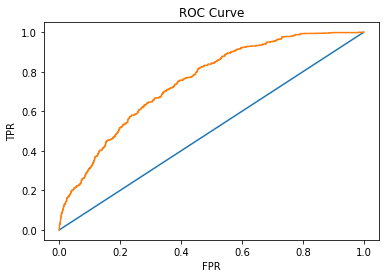

In [94]:
from sklearn.metrics import roc_curve, auc

y_score=model.predict_proba(X_test)[:,1]

FPR, TPR,thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(FPR,TPR)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [101]:
ROC_DATA = list(zip(list(FPR),list(TPR),list(thresholds)))  

In [107]:
print(len(ROC_DATA))
ROC_DATA[1000:1300]

2110


[(0.3549626467449306, 0.7083692838654012, 0.197386987125238),
 (0.3549626467449306, 0.7092320966350302, 0.1973733577459696),
 (0.3549626467449306, 0.7109577221742882, 0.19732743676840306),
 (0.35560298826040554, 0.7109577221742882, 0.19730303662387075),
 (0.3560298826040555, 0.7109577221742882, 0.1971314650982423),
 (0.3579509071504803, 0.7109577221742882, 0.19701041061983104),
 (0.35816435432230526, 0.7109577221742882, 0.196778494893846),
 (0.35880469583778013, 0.7109577221742882, 0.19658842489981043),
 (0.3592315901814301, 0.7109577221742882, 0.1962753033239381),
 (0.36029882604055496, 0.7109577221742882, 0.19617265557201802),
 (0.36051227321237994, 0.7109577221742882, 0.19598521146143885),
 (0.36051227321237994, 0.7135461604831751, 0.1959711813657554),
 (0.36264674493062965, 0.7135461604831751, 0.1957111551303984),
 (0.36264674493062965, 0.7152717860224331, 0.19570910375449663),
 (0.3628601921024546, 0.7152717860224331, 0.19564380819064056),
 (0.3641408751334045, 0.7152717860224331,

RandomSearchCV to find the optimal model

## Optimize wrt F1

In [129]:
import numpy as np
c_range = list(np.logspace(-3, 1, 256))
param_grid = dict(C=c_range)

In [134]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

grid = RandomizedSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'C': [0.001, 0.001036779197060366, 0.001074911103457137, 0.0011144454707535626, 0.00115543388033544, 0.0011979298107105216, 0.0012419887072831308, 0.001287668054695046, 0.0013350274518270132, 0.0013841286895587572, 0.0014350358313889448, 0.0014878152970202849, 0.0015425359490188...8.347734492114153, 8.654757464007233, 8.973072494285637, 9.303094895789918, 9.64525525623346, 10.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=True)

In [135]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=5.817091329374358, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
{'C': 5.817091329374358}
0.24419437168590116


## Optimize wrt Precision

In [143]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

grid = RandomizedSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=5.817091329374358, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'C': [0.001, 0.001036779197060366, 0.001074911103457137, 0.0011144454707535626, 0.00115543388033544, 0.0011979298107105216, 0.0012419887072831308, 0.001287668054695046, 0.0013350274518270132, 0.0013841286895587572, 0.0014350358313889448, 0.0014878152970202849, 0.0015425359490188...8.347734492114153, 8.654757464007233, 8.973072494285637, 9.303094895789918, 9.64525525623346, 10.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='precision', verbose=True)

In [144]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=0.7423149980177935, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
{'C': 0.7423149980177935}
0.6880441878702639


In [145]:
model1 = linear_model.LogisticRegression(solver='newton-cg',penalty='l2',C=0.7423149980177935)
model1.fit(X_train, y_train)

# accuracy for test & train:
train_acc=model1.score(X_train, y_train)
test_acc=model1.score(X_test,y_test)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_test
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_true, y_pred)
print(conf)

print ('\n')
print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))



Training Data Accuracy: 0.82
Test Data Accuracy:     0.81
[[4622   63]
 [1034  125]]


Precision:              0.82
Recall:                 0.99


In [153]:
tn, fp, fn, tp=confusion_matrix(y_true, y_pred).ravel()

print(tn, fp, fn, tp)

4622 63 1034 125


Text(0,0.5,'TPR')

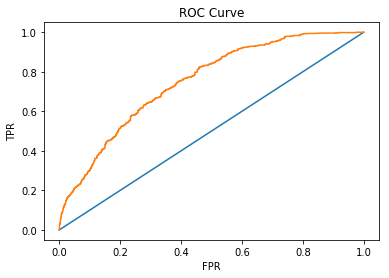

In [149]:
#Make this into a function to generate a ROC curve
y_score=model1.predict_proba(X_test)[:,1]

FPR, TPR, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(FPR,TPR)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [169]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

# test p-values
x = np.arange(10)[:, np.newaxis]
y = np.array([0,0,0,1,0,0,1,1,1,1])
model = LogisticRegression(C=1e30).fit(x, y)
print(logit_pvalue(model, x))

[0.11413093 0.08779978]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
